# In this notebook we will learn about Learning Rate with help of a classification project which distinguishes between Real and Fake currency Notes.


In [1]:
# Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read Data

df= pd.read_csv('banknotes.csv')

In [4]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df['class'].value_counts()

# this describes that there are 762 notes are valid and 610 notes are fake

0    762
1    610
Name: class, dtype: int64

In [6]:
# Displaying the Dataset

import seaborn as sns

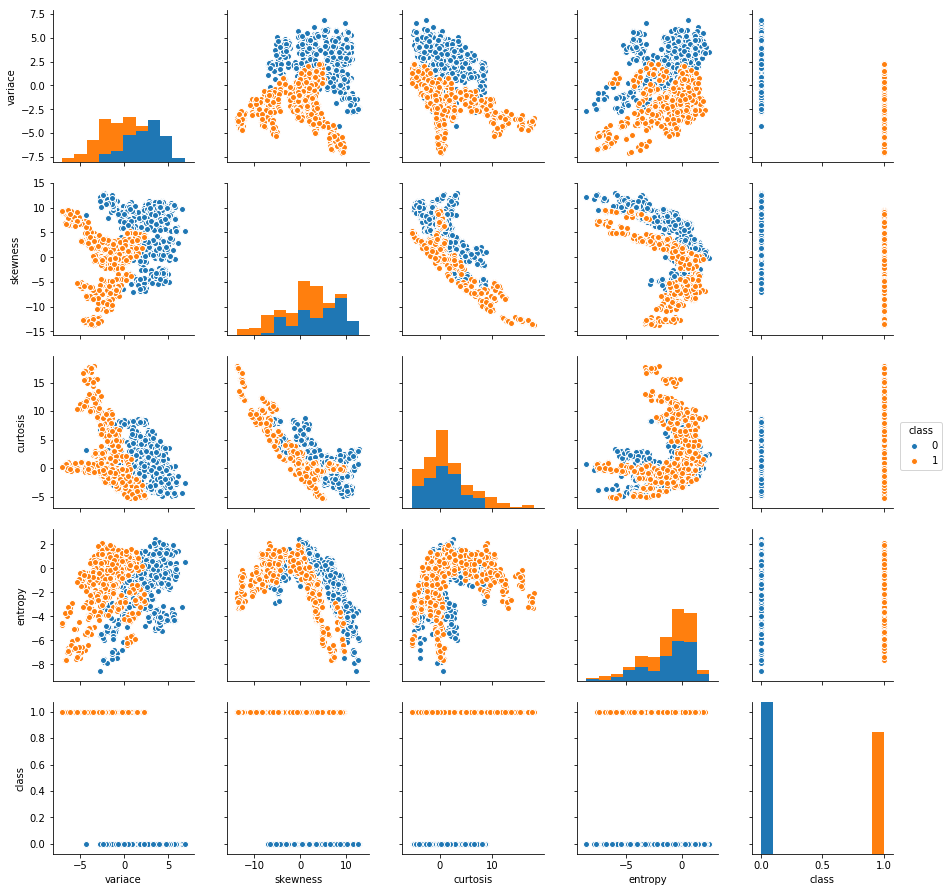

In [7]:
sns.pairplot(df,hue='class')

# hue = color 
# here we color the features in shade of 'class ' variable

In [8]:
# Building a Baseline Model

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [9]:
# scaling values of feature in range of class variable

X = scale(df.drop('class',axis =1).values)
y= df['class'].values

In [10]:
model = RandomForestClassifier()
cross_val_score(model,X,y)

# this shows us that the data is separable

array([0.99344978, 0.98249453, 0.99562363])

In [11]:
# Logistic Regression Model

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [12]:
# Applying Gradient Descent

import keras.backend as K  # for building more no. of models
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD # Stochastic Gradient Descent

Using TensorFlow backend.


In [13]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=10)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s 315us/step - loss: 1.2718 - acc: 0.2479
Epoch 2/10
960/960 [==============================] - 0s 35us/step - loss: 1.1231 - acc: 0.2552
Epoch 3/10
960/960 [==============================] - 0s 34us/step - loss: 0.9929 - acc: 0.2812
Epoch 4/10
960/960 [==============================] - 0s 35us/step - loss: 0.8816 - acc: 0.3260
Epoch 5/10
960/960 [==============================] - 0s 44us/step - loss: 0.7885 - acc: 0.4156
Epoch 6/10
960/960 [==============================] - 0s 36us/step - loss: 0.7118 - acc: 0.4938
Epoch 7/10
960/960 [==============================] - 0s 35us/step - loss: 0.6494 - acc: 0.6281
Epoch 8/10
960/960 [==============================] - 0s 38us/step - loss: 0.5986 - acc: 0.7969
Epoch 9/10
960/960 [==============================] - 0s 41us/step - loss: 0.5572 - acc: 0.8750
Epoch 10/10
412/412 [==============================] - 0s 87us/step


In [14]:
historydf = pd.DataFrame(history.history, index=history.epoch) 

# we saved modelfit in history to compare how our model is progressing

Text(0.5,1,'Test accuracy: 50.5 %')

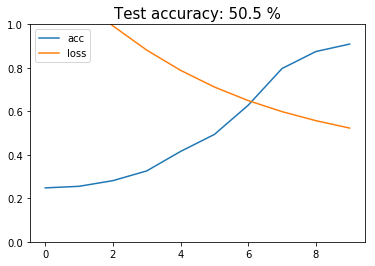

In [15]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[0]*100), fontsize=15)

In [16]:
# Applying Learning Rates

# create an empty list

dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0,epochs =10)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

# append dataframe of history to empty list

In [17]:
# concatenate dataframes

historydf = pd.concat(dflist,axis=1)

In [18]:
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.675000,0.605732,0.895833,0.358326,0.853125,0.466535,0.948958,0.209148
1,0.706250,0.568008,0.939583,0.268518,0.929167,0.272267,0.971875,0.115165
2,0.713542,0.536918,0.943750,0.231058,0.942708,0.218671,0.975000,0.091523
3,0.735417,0.510390,0.952083,0.207952,0.952083,0.186352,0.977083,0.079934
4,0.755208,0.487233,0.953125,0.191027,0.959375,0.164012,0.978125,0.072461
5,0.764583,0.466563,0.959375,0.177704,0.964583,0.147816,0.976042,0.067269
6,0.778125,0.447879,0.962500,0.166708,0.965625,0.135544,0.978125,0.063355
7,0.793750,0.430874,0.964583,0.157604,0.967708,0.125667,0.980208,0.060113
8,0.802083,0.415178,0.965625,0.149620,0.970833,0.117888,0.979167,0.057883
9,0.814583,0.400711,0.966667,0.142750,0.970833,0.111325,0.980208,0.055755


In [19]:
# displaying data by renaming

metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [20]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.675000  0.605732  0.895833  0.358326  0.853125  0.466535   
1              0.706250  0.568008  0.939583  0.268518  0.929167  0.272267   
2              0.713542  0.536918  0.943750  0.231058  0.942708  0.218671   
3              0.735417  0.510390  0.952083  0.207952  0.952083  0.186352   
4              0.755208  0.487233  0.953125  0.191027  0.959375  0.164012   
5              0.764583  0.466563  0.959375  0.177704  0.964583  0.147816   
6              0.778125  0.447879  0.962500  0.166708  0.965625  0.135544   
7              0.793750  0.430874  0.964583  0.157604  0.967708  0.125667   
8              0.802083  0.415178  0.965625  0.149620  0.970833  0.117888   
9              0.814583  0.400711  0.966667  0.142750  0.970833  0.111325   

learning_rate      0.50            
metric              acc      loss  
0              0.948958  0.209148  
1              0.971875  0.115165  
2              0.975000  0.091523  
3              0.977083  0.079934  
4              0.978125  0.072461  
5              0.976042  0.067269  
6              0.978125  0.063355  
7              0.980208  0.060113  
8              0.979167  0.057883  
9              0.980208  0.055755

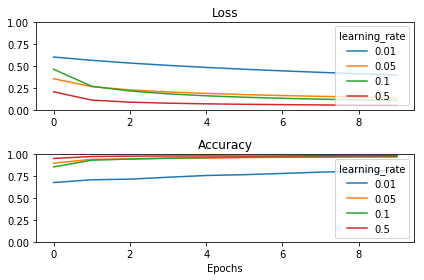

In [21]:
# creating subplots

ax = plt.subplot(211) # 1st plot
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212) # 2nd plot
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

# we see that 0.5 learning rate has maximum accuracy and minimun loss